In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
data = pd.read_csv('Salary.csv')

x = data['YearsExperience'].values
y = data['Salary'].values

x = (x - x.min()) / (x.max() - x.min())
y = (y - y.min()) / (y.max() - y.min())

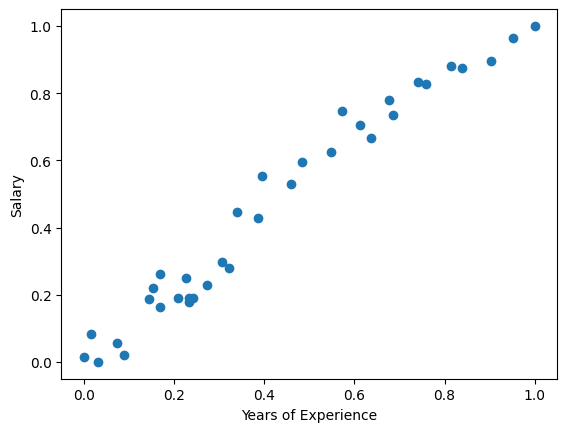

In [101]:
plt.scatter(x, y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [102]:
def costfunction(x, y, w, b):
    m = len(x)
    sum = 0
    for i in range(m):
        y_ = w * x[i] + b
        f_wb = (y_ - y[i]) ** 2
        sum = sum + f_wb
    totalsum = (1 / (2 * m)) * sum
    return totalsum

In [103]:
def gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_hat = w * x[i] + b
        dw = (y_hat - y[i]) * x[i]
        db = y_hat - y[i]
        dj_dw += dw
        dj_db += db
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

In [104]:
def gradientdescent(x, y, w_in, b_in, lr, iters):
    cost_hist = []
    for i in range(iters):
        dj_dw, dj_db = gradient(x, y, w_in, b_in)

        w_in = w_in - lr * dj_dw
        b_in = b_in - lr * dj_db
        if( i % 100 == 0):
            cost = costfunction(x, y, w_in, b_in)
            cost_hist.append(cost)
            
    return w_in, b_in, cost_hist
        

In [105]:
w_in = 2
b_in = 0
lr = 0.01
iters = 1000
cost = []
w , b, cost = gradientdescent(x, y, w_in, b_in, lr, iters)


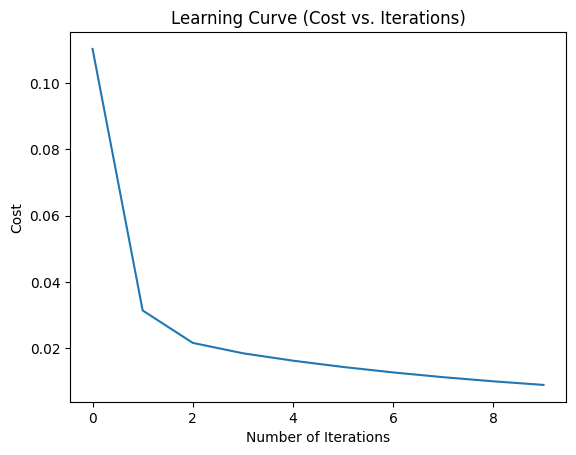

In [106]:
plt.plot(cost)
plt.title('Learning Curve (Cost vs. Iterations)')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

In [107]:
predicted_y = []
for i in range(len(x)):
    y_hat = w * x[i] + b
    predicted_y.append(y_hat)


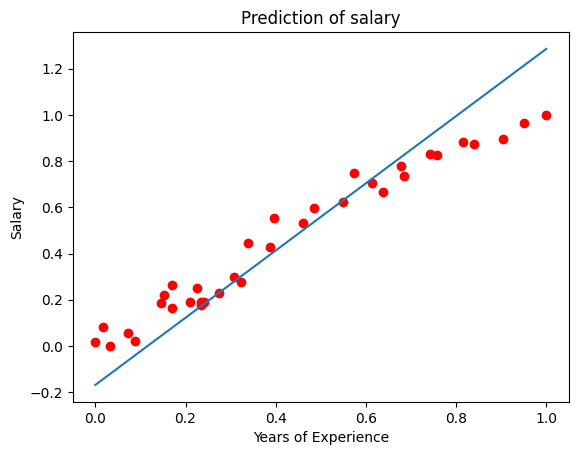

In [108]:
plt.plot(x, predicted_y)
plt.scatter(x , y, color= 'red')
plt.title('Prediction of salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()